###id:15-15-15

In [25]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mtplt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
data=pd.read_csv("week3.csv")
data.reset_index(inplace=True)
data.columns=['X1','X2','y']
data.head()

,X1,X2,y
0,0.41,-0.82,-0.507519
1,-1.00,-0.99,0.160197
2,0.85,0.73,1.865776
3,-0.53,-0.83,-0.734256
4,0.73,0.47,0.552451


In [27]:
df=data.copy()
df.head()

,X1,X2,y
0,0.41,-0.82,-0.507519
1,-1.00,-0.99,0.160197
2,0.85,0.73,1.865776
3,-0.53,-0.83,-0.734256
4,0.73,0.47,0.552451


In [28]:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]
point=np.column_stack((X1,X2,y))

## Answer 1) a)

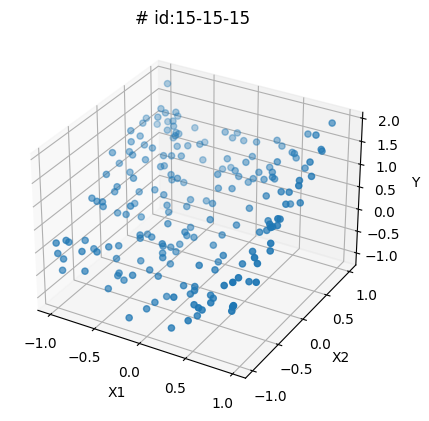

In [29]:
fig=plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('# id:15-15-15 ')
# ax.view_init(180)
# ax.view_init(360)
# plt.savefig('LaTex/images/Figure_1.png')
# plt.savefig('LaTex/images/Figure_1_180.png')
# plt.savefig('LaTex/images/Figure_1_360.png')
plt.show()

In [30]:
marks=[]
for val in point:
  marks.append(val)
center = np.mean(marks, axis=0)
_, e_values, e_vectors = np.linalg.svd(marks - center, full_matrices=False)
normal = e_vectors[2]
dispersion = e_values[2]
print('normal: ',normal)
print('dispersion: ',dispersion)

normal:  [ 0.00589297  0.76129464 -0.64837932]
dispersion:  3.6094470441670876


####  If the graph is viewed from all the angles, we can see that all the points lie on a curve and not on a plane. Also, when we view the dispersion from the normal axis, we see that the resulting value is high. Hence, the points lie on a curve.

## Answer i) b)

In [31]:
def get_regression_model_values_by_type(x,y,degree_poly,test_c_vals,name_of_model):
  
  x_poly=PolynomialFeatures(degree_poly).fit_transform(x)
  
  results_df=[]

  for c in test_c_vals:
    if(name_of_model=='Lasso'):
      model=Lasso(alpha=1/(2*c))
    elif (name_of_model=='Ridge'):
      model=Ridge(alpha=1/(2*c))
  
    model.fit(x_poly,y)

    result_dict={
      'C': c,
      'Coefficients':np.around(model.coef_,decimals=3),
      'Intercept': model.intercept_
    }

    results_df.append(result_dict)
  
  model_results=pd.DataFrame(results_df)
  return model_results

# poly_feature=5
test_c_values=[1, 5, 10, 50, 100,500,1000]
model_name='Lasso'
range_of_poly=[1,2,3,4,5]
poly_feature=5
for i in range_of_poly:

  result=get_regression_model_values_by_type(X,y,i,test_c_values,model_name)
  with pd.option_context('display.max_colwidth', 400):
    print(f'Parameters for degree of polynomial feature = {i}')
    display(result)

Parameters for degree of polynomial feature = 1


,C,Coefficients,Intercept
0,1,"[0.0, -0.0, 0.0]",0.452083
1,5,"[0.0, -0.0, 0.661]",0.428292
2,10,"[0.0, -0.0, 0.806]",0.423078
3,50,"[0.0, -0.0, 0.922]",0.418907
4,100,"[0.0, 0.0, 0.937]",0.418385
5,500,"[0.0, 0.0, 0.948]",0.417968
6,1000,"[0.0, 0.0, 0.95]",0.417916


Parameters for degree of polynomial feature = 2


,C,Coefficients,Intercept
0,1,"[0.0, -0.0, 0.0, 0.0, -0.0, 0.0]",0.452083
1,5,"[0.0, -0.0, 0.661, 0.0, -0.0, 0.0]",0.428292
2,10,"[0.0, 0.0, 0.824, 0.478, 0.0, 0.0]",0.231994
3,50,"[0.0, 0.018, 0.956, 0.884, 0.0, 0.0]",0.066741
4,100,"[0.0, 0.034, 0.973, 0.938, 0.002, 0.0]",0.046330
5,500,"[0.0, 0.047, 0.99, 0.981, 0.034, 0.009]",0.027269
6,1000,"[0.0, 0.048, 0.992, 0.986, 0.038, 0.014]",0.023469


Parameters for degree of polynomial feature = 3


,C,Coefficients,Intercept
0,1,"[0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0]",0.452083
1,5,"[0.0, -0.0, 0.661, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0]",0.428292
2,10,"[0.0, 0.0, 0.824, 0.478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.231994
3,50,"[0.0, 0.018, 0.956, 0.884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.066741
4,100,"[0.0, 0.019, 0.973, 0.939, 0.003, 0.0, 0.022, -0.0, 0.0, 0.0]",0.045607
5,500,"[0.0, -0.0, 1.012, 0.989, 0.033, 0.011, 0.054, -0.058, 0.047, -0.0]",0.022269
6,1000,"[0.0, -0.034, 1.024, 0.999, 0.037, 0.02, 0.092, -0.079, 0.072, -0.005]",0.014882


Parameters for degree of polynomial feature = 4


,C,Coefficients,Intercept
0,1,"[0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0]",0.452083
1,5,"[0.0, -0.0, 0.661, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0]",0.428292
2,10,"[0.0, 0.0, 0.824, 0.478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.231994
3,50,"[0.0, 0.018, 0.956, 0.884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.066741
4,100,"[0.0, 0.019, 0.973, 0.939, 0.003, 0.0, 0.022, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.045607
5,500,"[0.0, -0.0, 1.011, 0.999, 0.033, 0.024, 0.054, -0.059, 0.044, -0.0, 0.0, 0.0, -0.03, 0.0, 0.0]",0.018162
6,1000,"[0.0, -0.033, 1.028, 1.039, 0.026, 0.071, 0.091, -0.08, 0.062, -0.016, -0.0, 0.022, -0.124, -0.0, -0.0]",-0.001732


Parameters for degree of polynomial feature = 5


,C,Coefficients,Intercept
0,1,"[0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.452083
1,5,"[0.0, -0.0, 0.661, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0]",0.428292
2,10,"[0.0, 0.0, 0.824, 0.478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.231994
3,50,"[0.0, 0.018, 0.956, 0.884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0]",0.066741
4,100,"[0.0, 0.021, 0.973, 0.94, 0.003, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025, -0.0, 0.0, -0.0, 0.0, 0.0]",0.045350
5,500,"[0.0, -0.001, 1.012, 1.0, 0.033, 0.021, 0.0, -0.066, 0.0, -0.0, 0.0, 0.005, -0.017, 0.0, 0.0, 0.077, -0.0, 0.0, -0.0, 0.067, -0.0]",0.016946
6,1000,"[0.0, -0.022, 1.031, 1.04, 0.025, 0.069, -0.0, -0.088, 0.0, -0.0, -0.0, 0.03, -0.116, -0.0, -0.0, 0.104, 0.0, -0.0, -0.0, 0.091, -0.027]",-0.002817


## Answer i) c)

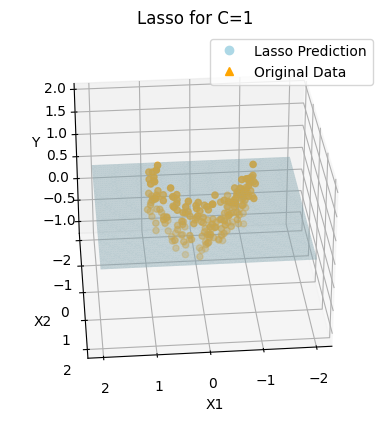

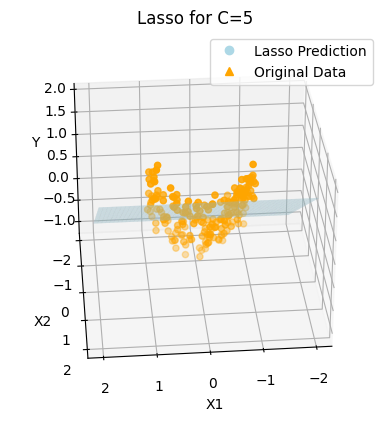

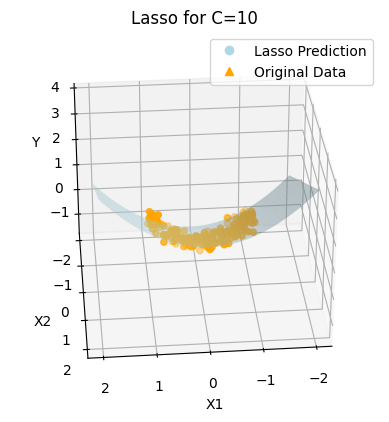

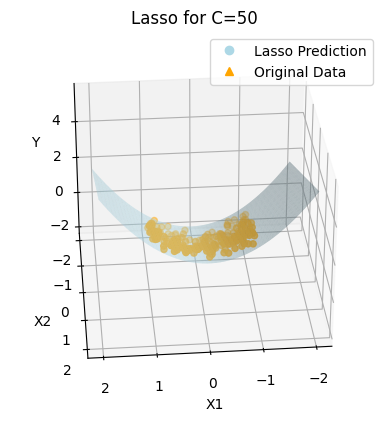

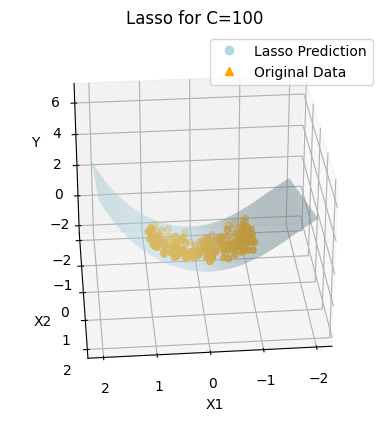

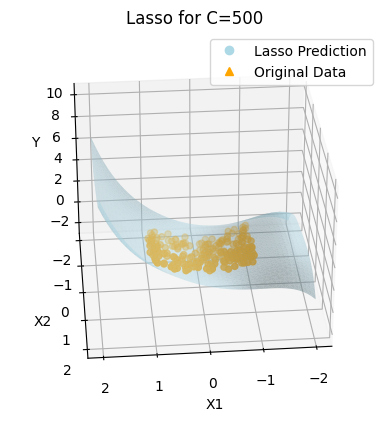

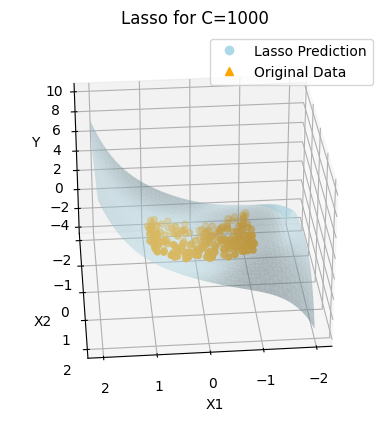

In [35]:
def plot_preds_by_c_and_model(x,y,x_test,test_c_values,model_name,colour_of_plot):

  x_poly=PolynomialFeatures(poly_feature).fit_transform(x)
  x_poly_test =PolynomialFeatures(poly_feature).fit_transform(x_test)

  for c in test_c_values:
    if(model_name=='Lasso'):
        model=Lasso(alpha=1/(2*c))
    elif (model_name=='Ridge'):
        model=Ridge(alpha=1/(2*c))

    model.fit(x_poly,y)
    predictions=model.predict(x_poly_test)
    

    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')

    ax.plot_trisurf(x_test[:,0],x_test[:,1],predictions,color=colour_of_plot[0],alpha=0.5)
    ax.scatter(X1,X2,y,color=colour_of_plot[1], label='Original Data')
    colors=['y','r']
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title(f'{model_name} for C={c}')

    scatter_plot_1=mtplt.lines.Line2D([0],[0],linestyle='none',c=colour_of_plot[0],marker='o')
    scatter_plot_2=mtplt.lines.Line2D([0],[0],linestyle='none',c=colour_of_plot[1],marker='^')
    ax.legend([scatter_plot_1,scatter_plot_2],[f'{model_name} Prediction','Original Data'],numpoints=1)
    ax.view_init(azim=85)
    if model_name=='Lasso':
      plt.savefig(f'LaTex/images/Figure_2_{c}.png')
    elif model_name=='Ridge':
      plt.savefig(f'LaTex/images/Figure_3_{c}.png')

poly_test_degree = 5 
test_c = [1, 5, 10, 50, 100,500,1000]
model_type = 'Lasso'
plot_colours=['lightblue','orange']
Xtest=[]
grid=np.linspace(-2,2)
for i in grid:
  for j in grid:
      Xtest.append([i,j])
Xtest = np.array(Xtest)

plot_preds_by_c_and_model(X,y,Xtest,test_c,model_type,plot_colours)


## Answer i) e)

Parameters for degree of polynomial feature = 1


,C,Coefficients,Intercept
0,1,"[0.0, 0.001, 0.944]",0.418165
1,5,"[0.0, 0.001, 0.95]",0.417982
2,10,"[0.0, 0.001, 0.95]",0.417960
3,50,"[0.0, 0.001, 0.951]",0.417941
4,100,"[0.0, 0.001, 0.951]",0.417939
5,500,"[0.0, 0.001, 0.951]",0.417937
6,1000,"[0.0, 0.001, 0.951]",0.417937


Parameters for degree of polynomial feature = 2


,C,Coefficients,Intercept
0,1,"[0.0, 0.048, 0.985, 0.967, 0.039, 0.019]",0.029749
1,5,"[0.0, 0.049, 0.992, 0.987, 0.041, 0.019]",0.021724
2,10,"[0.0, 0.05, 0.993, 0.989, 0.042, 0.019]",0.020699
3,50,"[0.0, 0.05, 0.994, 0.991, 0.042, 0.019]",0.019875
4,100,"[0.0, 0.05, 0.994, 0.991, 0.042, 0.019]",0.019772
5,500,"[0.0, 0.05, 0.994, 0.992, 0.042, 0.019]",0.019689
6,1000,"[0.0, 0.05, 0.994, 0.992, 0.042, 0.019]",0.019679


Parameters for degree of polynomial feature = 3


,C,Coefficients,Intercept
0,1,"[0.0, -0.048, 1.0, 0.982, 0.041, 0.029, 0.106, -0.065, 0.079, 0.015]",0.019112
1,5,"[0.0, -0.067, 1.044, 1.002, 0.042, 0.03, 0.129, -0.091, 0.096, -0.031]",0.010009
2,10,"[0.0, -0.07, 1.05, 1.004, 0.042, 0.03, 0.132, -0.094, 0.099, -0.038]",0.008818
3,50,"[0.0, -0.072, 1.055, 1.006, 0.042, 0.031, 0.135, -0.097, 0.101, -0.043]",0.007856
4,100,"[0.0, -0.072, 1.056, 1.006, 0.042, 0.031, 0.135, -0.098, 0.101, -0.044]",0.007735
5,500,"[0.0, -0.073, 1.057, 1.006, 0.042, 0.031, 0.135, -0.098, 0.102, -0.045]",0.007639
6,1000,"[0.0, -0.073, 1.057, 1.007, 0.042, 0.031, 0.135, -0.098, 0.102, -0.045]",0.007626


Parameters for degree of polynomial feature = 4


,C,Coefficients,Intercept
0,1,"[0.0, -0.059, 0.999, 0.875, 0.032, 0.109, 0.118, -0.064, 0.081, 0.013, 0.158, 0.05, -0.093, -0.034, -0.049]",0.015652
1,5,"[0.0, -0.063, 1.05, 1.084, 0.041, 0.172, 0.122, -0.102, 0.083, -0.042, -0.021, 0.051, -0.186, -0.039, -0.078]",-0.024414
2,10,"[0.0, -0.062, 1.058, 1.127, 0.042, 0.184, 0.121, -0.108, 0.082, -0.051, -0.059, 0.051, -0.204, -0.038, -0.084]",-0.032213
3,50,"[0.0, -0.061, 1.064, 1.166, 0.043, 0.195, 0.12, -0.113, 0.082, -0.058, -0.095, 0.051, -0.22, -0.038, -0.089]",-0.039226
4,100,"[0.0, -0.061, 1.065, 1.172, 0.043, 0.197, 0.12, -0.113, 0.081, -0.058, -0.1, 0.051, -0.222, -0.038, -0.09]",-0.040158
5,500,"[0.0, -0.061, 1.065, 1.176, 0.043, 0.198, 0.119, -0.114, 0.081, -0.059, -0.104, 0.051, -0.224, -0.038, -0.09]",-0.040913
6,1000,"[0.0, -0.061, 1.066, 1.176, 0.043, 0.198, 0.119, -0.114, 0.081, -0.059, -0.104, 0.051, -0.224, -0.038, -0.09]",-0.041008


Parameters for degree of polynomial feature = 5


,C,Coefficients,Intercept
0,1,"[0.0, -0.024, 0.986, 0.856, 0.027, 0.101, -0.063, -0.076, -0.004, 0.1, 0.182, 0.055, -0.091, -0.024, -0.043, 0.186, 0.023, -0.039, -0.027, 0.145, -0.083]",0.017465
1,5,"[0.0, 0.004, 1.053, 1.041, 0.017, 0.146, -0.182, -0.271, -0.027, 0.049, 0.025, 0.075, -0.168, -0.016, -0.061, 0.301, 0.157, -0.119, 0.037, 0.225, -0.101]",-0.016737
2,10,"[0.0, 0.015, 1.07, 1.076, 0.011, 0.15, -0.227, -0.344, -0.031, 0.037, -0.007, 0.083, -0.178, -0.01, -0.062, 0.342, 0.215, -0.138, 0.06, 0.242, -0.105]",-0.022339
3,50,"[0.0, 0.029, 1.088, 1.107, 0.002, 0.15, -0.286, -0.431, -0.036, 0.027, -0.035, 0.092, -0.184, -0.002, -0.06, 0.394, 0.287, -0.156, 0.087, 0.258, -0.11]",-0.026576
4,100,"[0.0, 0.032, 1.091, 1.111, 0.0, 0.149, -0.296, -0.445, -0.037, 0.026, -0.039, 0.094, -0.184, -0.0, -0.059, 0.403, 0.299, -0.158, 0.091, 0.26, -0.111]",-0.027051
5,500,"[0.0, 0.034, 1.093, 1.114, -0.001, 0.149, -0.305, -0.456, -0.037, 0.025, -0.042, 0.095, -0.184, 0.001, -0.059, 0.41, 0.309, -0.159, 0.094, 0.261, -0.112]",-0.027415
6,1000,"[0.0, 0.034, 1.093, 1.114, -0.001, 0.149, -0.306, -0.458, -0.037, 0.025, -0.042, 0.095, -0.184, 0.001, -0.059, 0.411, 0.31, -0.16, 0.095, 0.261, -0.112]",-0.027460


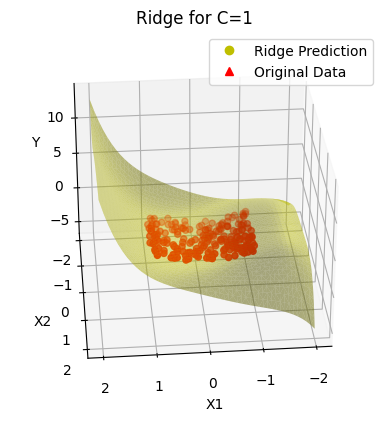

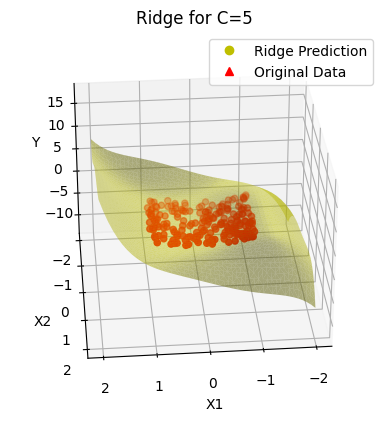

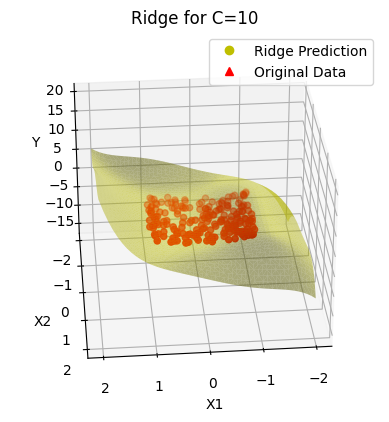

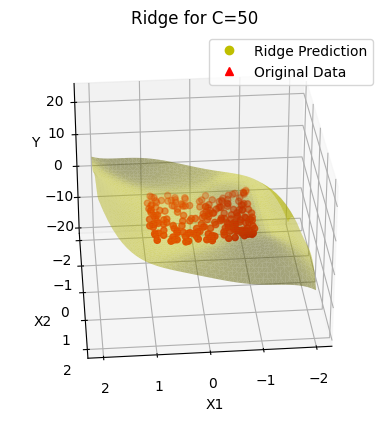

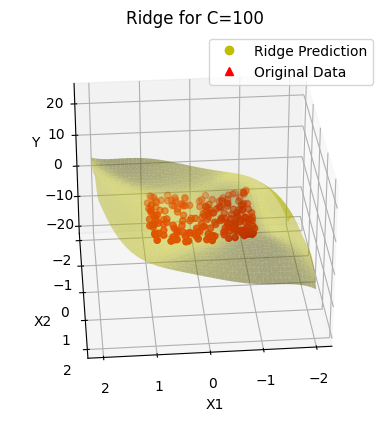

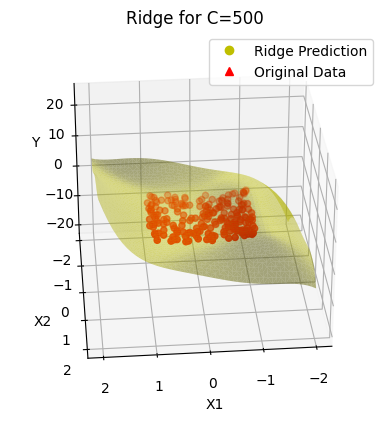

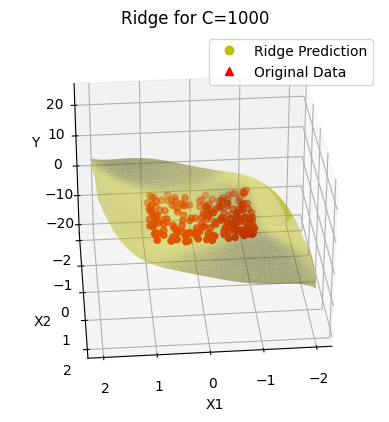

In [36]:
#Get Regression results
range_of_poly = [1,2,3,4,5] 
for i in range_of_poly:
    c_test = [1, 5, 10, 50, 100,500,1000]
    model_type = 'Ridge'
    result=get_regression_model_values_by_type(X, y, i, c_test, model_type)
    with pd.option_context('display.max_colwidth', 400):
        print(f'Parameters for degree of polynomial feature = {i}')
        display(result)

#Plot Predictions 
model_type = 'Ridge'
plot_colors = ['y', 'r']
plot_preds_by_c_and_model(X, y, Xtest, c_test, model_type, plot_colors)

## Answer ii) a)

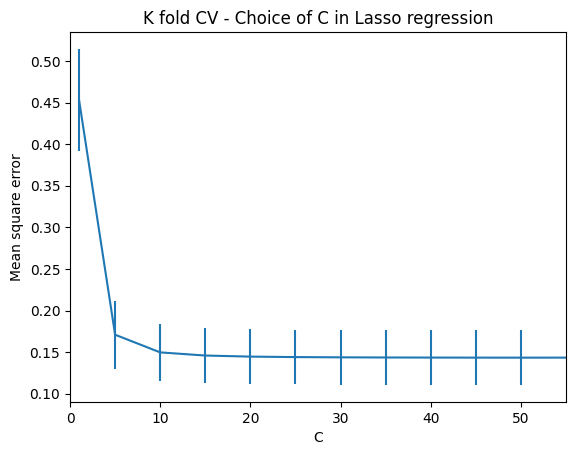

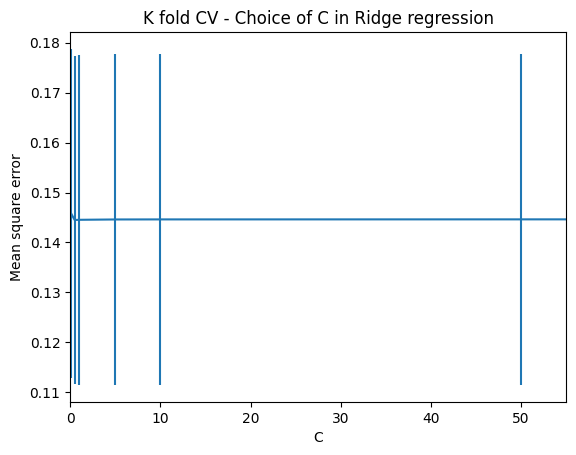

In [34]:
def kfcv(x,y,c_range,name_of_model):
  mean_error=[];std_error=[];
  for c in c_range:
    if(name_of_model=='Lasso'):
      model=Lasso(alpha=1/(2*c))
    elif(name_of_model=='Ridge'):
      model=Ridge(alpha=1/(2*c))
    
    mean_square_error_temp=[]
    kf=KFold(n_splits=5)
    for train,test in kf.split(x):
      model.fit(x[train],y[train])
      predictions=model.predict(x[test])
      mean_square_error_temp.append(mean_squared_error(y[test],predictions))
    mean_error.append(np.array(mean_square_error_temp).mean())
    std_error.append(np.array(mean_square_error_temp).std())
  plt.errorbar(c_range,mean_error,yerr=std_error)
  plt.xlabel('C'); plt.ylabel('Mean square error')
  plt.title('K fold CV - Choice of C in {} regression'.format(name_of_model))
  plt.xlim((0,55))
  if name_of_model=='Lasso':
    plt.savefig(f'LaTex/images/Figure_4.png')
  elif name_of_model=='Ridge':
    plt.savefig(f'LaTex/images/Figure_5.png')
  plt.show()

c_vals=[1,5,10,15,20,25,30,35,40,45,50,100,500,1000]
model='Lasso'
kfcv(X,y,c_vals,model)

c_vals_1=[0.1, 0.5, 1, 5, 10, 50, 100]
model1='Ridge'
kfcv(X,y,c_vals_1,model1)
